In [15]:
# imports 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import glob 
from sklearn.utils import shuffle 
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
import cv2 

# Introduction 

File naming format: NFI-XXXYYZZZ  
- XXX - ID number of the person who has done the signature.  
- YY - Image sample number.  
- ZZZ - ID number of person's signature that is in the photo. 

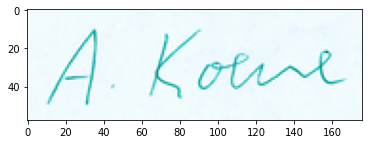

In [16]:
# check out one of the genuine sample signatures 
genuine_tmp = plt.imread('data\\sample_Signature\\sample_Signature\\genuine\\NFI-01401014.png')
plt.imshow(genuine_tmp)

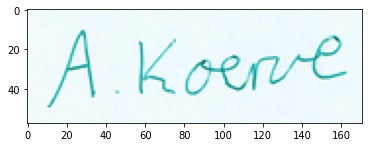

In [17]:
# check out one of the forged sample signatures 
forged_tmp = plt.imread('data\\sample_Signature\\sample_Signature\\forged\\NFI-00101014.png')
plt.imshow(forged_tmp)

# Read in and Format Data 

In [18]:
genuine_files = [
    glob.glob('data/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
    glob.glob('data/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
    glob.glob('data/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
    glob.glob('data/Dataset_Signature_Final/Dataset/dataset4/real/*.*')
]

forged_files = [
    glob.glob('data/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'), 
    glob.glob('data/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
    glob.glob('data/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
    glob.glob('data/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')
]

In [19]:
train_data = []
train_labels = []
test_data = []
test_labels = []

# genuine signatures 
for data in range(len(genuine_files)):
    for img in genuine_files[data]:
        image = cv2.imread(img) 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        if data == 3:
            test_data.append(image)
            test_labels.append(0)   # label 0 for genuine
        else:
            train_data.append(image) 
            train_labels.append(0)   # label 0 for genuine 

# forged signatures
for data in range(len(forged_files)):
    for img in forged_files[data]:
        image = cv2.imread(img) 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        if data == 3:
            test_data.append(image)
            test_labels.append(1)   # label 1 for forged 
        else:
            train_data.append(image) 
            train_labels.append(1)  # label 1 for forged 

In [20]:
train_data = np.array(train_data) / 255.0 
train_labels = np.array(train_labels)

test_data = np.array(test_data) / 255.0
test_labels = np.array(test_labels)

In [21]:
train_data.shape

(540, 224, 224, 3)

In [22]:
train_labels.shape

(540,)

In [23]:
test_data.shape

(180, 224, 224, 3)

In [24]:
test_labels.shape

(180,)

In [25]:
train_data, train_labels = shuffle(train_data, train_labels, random_state = 42)
test_data, test_labels = shuffle(test_data, test_labels, random_state = 42)

# Modeling

In [26]:
EPOCHS = 20
BATCH_SIZE = 16

early_stop = EarlyStopping(monitor = 'val_loss', patience = 8, verbose = 1)
reduce_lr_plat = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.0001, patience = 5, verbose = 1)

## Model 1  
Building a model from scratch using Keras

In [29]:
model1 = Sequential()
lr1 = 0.001

model1_tensor_board = TensorBoard(log_dir = './logs/model1')
model1_callbacks = [early_stop, reduce_lr_plat, model1_tensor_board]

model1.add(Conv2D(32, (3, 3), input_shape = (224, 224, 3), activation = 'relu'))
model1.add(MaxPool2D(3, 3))
model1.add(Conv2D(64, (3, 3), activation = 'relu'))
model1.add(MaxPool2D(2, 2))
model1.add(Flatten())
model1.add(Dense(128, activation = 'relu'))
model1.add(Dropout(rate = 0.3))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(optimizer = Adam(learning_rate = lr1), loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 82944)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [30]:
history = model1.fit(
    train_data, 
    train_labels, 
    epochs = EPOCHS, 
    batch_size = BATCH_SIZE, 
    callbacks = model1_callbacks, 
    validation_split = 0.1
)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\prodb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\prodb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\prodb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\prodb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\prodb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\prodb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\prodb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\prodb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\prodb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\prodb\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


## Model 2  
